In [648]:
import numpy as np

radii = [1,2,3]
density = 30

X = np.array([])
Y = np.array([])
T = np.array([])

for n, r in enumerate(radii):
    theta = np.linspace(0, 2*np.pi, int(density*r))[:-1]
    T = np.append(T, theta + 2*np.pi*n)
    X = np.append(X, r*np.cos(theta))
    Y = np.append(Y, r*np.sin(theta))

XY = np.column_stack((X,Y))

In [511]:
from sklearn.decomposition import KernelPCA

# fit kpca
kernel_pca = KernelPCA(n_components=3, # show 3d projection
                       kernel="rbf",   # gaussian kernel
                       gamma=5
                       )
kpca_fit = kernel_pca.fit(XY)
kpca_X, kpca_Y, kpca_Z = kpca_fit.transform(XY).T

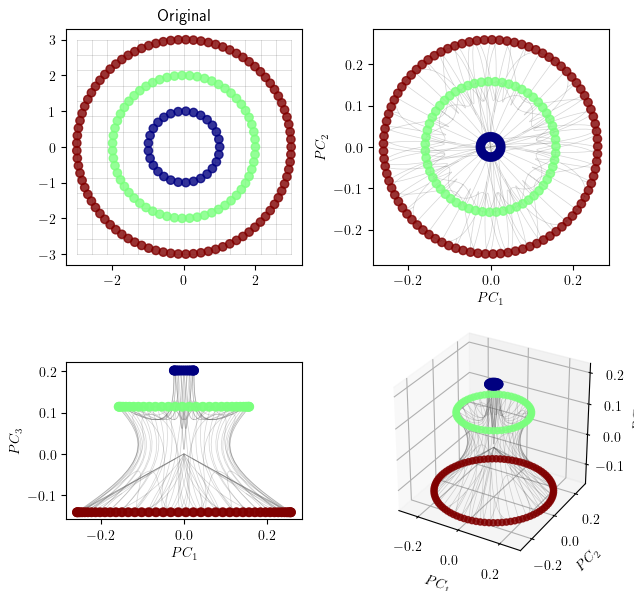

In [646]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

# set up axes for plotting
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(221) # plot original data
ax2 = fig.add_subplot(222) # plot PC1 vs PC2
ax3 = fig.add_subplot(223) # plot PC1 vs PC3
ax4 = fig.add_subplot(224, projection='3d') # plot PC1, PC2, PC3

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_aspect('equal')

# axis labels
ax1.set_title("Original")

ax2.set_xlabel("$PC_1$")
ax2.set_ylabel("$PC_2$")

ax3.set_xlabel("$PC_1$")
ax3.set_ylabel("$PC_3$")

ax4.set_xlabel("$PC_1$")
ax4.set_ylabel("$PC_2$")
ax4.set_zlabel("$PC_3$")

# plotting properties
pt_props = {
    "c": np.sqrt(X**2 + Y**2), # marker color
    "cmap": "jet",             # color map
    "alpha": .8,               # transparency
    "zorder": 2.5              # plot points over lines
}
grid_props = {
    "c": '#555',     # line color
    "linewidth": .5, # line width
    "alpha": .25     # transparency
}

# plot grid
xs, ys = np.meshgrid(np.linspace(-3, 3, 100),
                     np.linspace(-3, 3, 15)
                     )
# loop over lines
for x, y in zip(xs,ys):
    # vertical grid lines
    pc1, pc2, pc3 = kpca_fit.transform(np.column_stack((x, y))).T
    ax1.plot(x, y, **grid_props)
    ax2.plot(pc1, pc2, **grid_props)
    ax3.plot(pc1, pc3, **grid_props)
    ax4.plot(pc1, pc2, pc3, **grid_props)
    # horizontal grid lines
    pc1, pc2, pc3 = kpca_fit.transform(np.column_stack((y, x))).T
    ax1.plot(y, x, **grid_props)
    ax2.plot(pc1, pc2, **grid_props)
    ax3.plot(pc1, pc3, **grid_props)
    ax4.plot(pc1, pc2, pc3, **grid_props)

# plot xy data
ax1.scatter(X, Y, **pt_props)
# plot PC1 vs PC3 transformed data
ax2.scatter(kpca_X, kpca_Y, **pt_props)
# plot PC1 vs PC3 transformed data
ax3.scatter(kpca_X, kpca_Z, **pt_props)
# plot 3d transformed data
ax4.scatter(kpca_X, kpca_Y, kpca_Z, **pt_props)

fig.subplots_adjust(wspace=.3)
fig.savefig("fig_kpca_example.pdf")
plt.show()